<a href="https://colab.research.google.com/github/Muhammad0Awais/submission_AI_conference/blob/main/Meta_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest plots for Meta-analytical study of defect prediction comparison between Naive Bayes and Random Forests.

## Installing packages


In [ ]:
install.packages("devtools") #will help us to install required packages
devtools::install_github("guido-s/meta") #installation of meta - package for a meta-analysis

library(meta)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘roxygen2’, ‘urlchecker’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”



tibble       (3.1.7 -> 3.1.8    ) [CRAN]
mathjaxr     (NA    -> 1.6-0    ) [CRAN]
RcppEigen    (NA    -> 0.3.3.9.2) [CRAN]
nloptr       (NA    -> 2.0.3    ) [CRAN]
minqa        (NA    -> 1.2.4    ) [CRAN]
pbapply      (NA    -> 1.5-0    ) [CRAN]
metadat      (NA    -> 1.2-0    ) [CRAN]
CompQuadForm (NA    -> 1.4.3    ) [CRAN]
lme4         (NA    -> 1.1-30   ) [CRAN]
metafor      (NA    -> 3.8-1    ) [CRAN]


Installing 10 packages: tibble, mathjaxr, RcppEigen, nloptr, minqa, pbapply, metadat, CompQuadForm, lme4, metafor

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpRozWFb/remotes3164b14678/guido-s-meta-7d7c227/DESCRIPTION’ ... OK
* preparing ‘meta’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘meta_6.0-1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading 'meta' package (version 6.0-1).
Type 'help(meta)' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'meta' package: https://tinyurl.com/dt4y5drs



Loading the file to use it for our meta-analysis!

In [ ]:
file = "/content/data/dataset.csv"
our_data <- read.csv(file)
our_data

Title,Authors,Year,Number_of_observations_for_NB,Number_of_observations_for_RF,Precision_NB_mean,Precision_RF_mean,Precision_NB_std,Precision_RF_std,Recall_NB_mean,Recall_RF_mean,Recall_NB_std,Recall_RF_std,F_Measure_NB_mean,F_Measure_RF_mean,F_Measure_NB_std,F_Measure_RF_std
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Performance analysis of machine learning techniques on software defect prediction using NASA datasets,Iqbal AAftab SAli U et al.,2019,24,24,0.6017917,0.6468750,0.32214458,0.3122687,0.6260417,0.5792500,0.33198605,0.395229515,0.5855000,0.5908333,0.31297159,0.35651254
Is Open-Source Software Valuable for Software Defect Prediction of Proprietary Software and Vice Versa?,Kakkar MJain SBansal A et al.,2018,7,7,0.8485714,0.8385714,0.11625096,0.1273353,0.9514286,0.9914286,0.01951800,0.006900656,0.8942857,0.9057143,0.06876461,0.07870983
Evaluating defect prediction approaches using a massive set of metrics: An empirical study,Xuan XLo DXia X et al.,2015,1,1,0.4500000,0.5130000,0.00000000,0.0000000,0.3830000,0.3070000,0.00000000,0.000000000,0.3990000,0.3730000,0.00000000,0.00000000
"Software fault proneness prediction: a comparative study between bagging, boosting, and stacking ensemble and base learner methods",Alazzam IAlsmadi IAkour M,2017,4,4,0.8980000,0.8920000,0.05028585,0.0454826,0.9252500,0.9672500,0.02075853,0.015326991,0.7975000,0.9282500,0.03506660,0.03162673
The Integrity of Machine Learning Algorithms against Software Defect Prediction,Khakhar&Dubey et al.,2020,6,6,NA,NA,NA,NA,0.3658333,0.2025000,0.39933333,0.206000000,NA,NA,NA,NA


In [ ]:
str(our_data) #structure of our dataset

'data.frame':	5 obs. of  17 variables:
 $ Title                        : chr  "Performance analysis of machine learning techniques on software defect prediction using NASA datasets" "Is Open-Source Software Valuable for Software Defect Prediction of Proprietary Software and Vice Versa?" "Evaluating defect prediction approaches using a massive set of metrics: An empirical study" "Software fault proneness prediction: a comparative study between bagging, boosting, and stacking ensemble and b"| __truncated__ ...
 $ Authors                      : chr  "Iqbal AAftab SAli U et al." "Kakkar MJain SBansal A et al." "Xuan XLo DXia X et al." "Alazzam IAlsmadi IAkour M" ...
 $ Year                         : int  2019 2018 2015 2017 2020
 $ Number_of_observations_for_NB: int  24 7 1 4 6
 $ Number_of_observations_for_RF: int  24 7 1 4 6
 $ Precision_NB_mean            : num  0.602 0.849 0.45 0.898 NA
 $ Precision_RF_mean            : num  0.647 0.839 0.513 0.892 NA
 $ Precision_NB_std             : 

In [ ]:
min(our_data$Number_of_observations_for_NB) #minimum number of experiments done in the considered papers

[1] 1

In [ ]:
summary(our_data) #the descriptive statistics of our dataset

    Title             Authors               Year     
 Length:5           Length:5           Min.   :2015  
 Class :character   Class :character   1st Qu.:2017  
 Mode  :character   Mode  :character   Median :2018  
                                       Mean   :2018  
                                       3rd Qu.:2019  
                                       Max.   :2020  
                                                     
 Number_of_observations_for_NB Number_of_observations_for_RF Precision_NB_mean
 Min.   : 1.0                  Min.   : 1.0                  Min.   :0.4500   
 1st Qu.: 4.0                  1st Qu.: 4.0                  1st Qu.:0.5638   
 Median : 6.0                  Median : 6.0                  Median :0.7252   
 Mean   : 8.4                  Mean   : 8.4                  Mean   :0.6996   
 3rd Qu.: 7.0                  3rd Qu.: 7.0                  3rd Qu.:0.8609   
 Max.   :24.0                  Max.   :24.0                  Max.   :0.8980   
               

In [ ]:
ma_random_recall <- metacont(n.e = our_data$Number_of_observations_for_NB,
                  mean.e = our_data$Recall_NB_mean,
                  sd.e = our_data$Recall_NB_std,
                  label.e = 'NB',
                  n.c = our_data$Number_of_observations_for_RF,
                  mean.c = our_data$Recall_RF_mean,
                  sd.c = our_data$Recall_RF_std,
                  label.c = 'RF',
                  subset=c(1,2,4,5),
                  studlab = our_data$Authors,
                  comb.fixed = FALSE,
                  comb.random = TRUE,
                  method.tau = "SJ",
                  hakn = TRUE,
                  prediction = TRUE,
                  sm = "SMD")
ma_random_recall

Number of studies combined: k = 4
Number of observations: o = 82

                         SMD            95%-CI     t p-value
Random effects model -0.8441 [-3.2384; 1.5502] -1.12  0.3436
Prediction interval          [-7.4411; 5.7528]              

Quantifying heterogeneity:
 tau^2 = 1.7898 [0.2665; 31.3343]; tau = 1.3378 [0.5162; 5.5977]
 I^2 = 80.2% [47.6%; 92.5%]; H = 2.25 [1.38; 3.65]

Test of heterogeneity:
     Q d.f. p-value
 15.14    3  0.0017

Details on meta-analytical method:
- Inverse variance method
- Sidik-Jonkman estimator for tau^2
- Q-Profile method for confidence interval of tau^2 and tau
- Hartung-Knapp (HK) adjustment for random effects model (df = 3)
- Prediction interval based on t-distribution (HTS) (df = 2)
- Hedges' g (bias corrected standardised mean difference; using exact formulae)

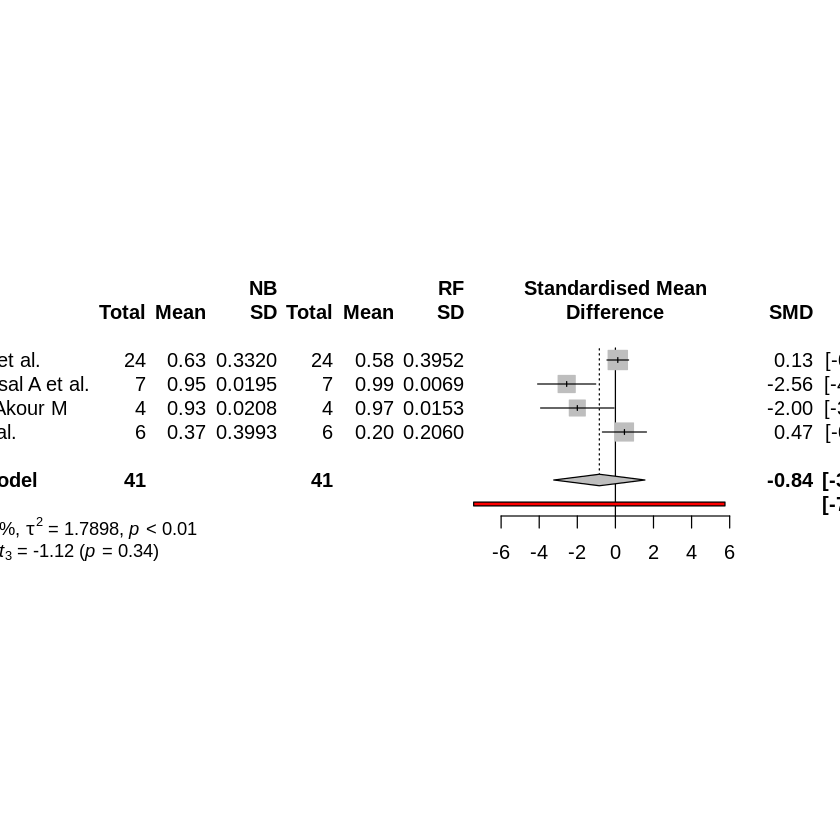

In [ ]:
forest(ma_random_recall, test.overall.random=TRUE)

In [ ]:
ma_random_precision <- metacont(n.e = our_data$Number_of_observations_for_NB,
                  mean.e = our_data$Precision_NB_mean,
                  sd.e = our_data$Precision_NB_std,
                  label.e = 'NB',
                  n.c = our_data$Number_of_observations_for_RF,
                  mean.c = our_data$Precision_RF_mean,
                  sd.c = our_data$Precision_RF_std,
                  subset=c(1,2,4),
                  label.c = 'RF',
                  studlab = our_data$Authors,
                  comb.fixed = FALSE,
                  comb.random = TRUE,
                  method.tau = "SJ",
                  hakn = TRUE,
                  prediction = TRUE,
                  sm = "SMD")
ma_random_precision

Number of studies combined: k = 3
Number of observations: o = 70

                         SMD            95%-CI     t p-value
Random effects model -0.0675 [-0.3915; 0.2564] -0.90  0.4645
Prediction interval          [-3.1535; 3.0184]              

Quantifying heterogeneity:
 tau^2 = 0.0011 [0.0000; 0.5254]; tau = 0.0335 [0.0000; 0.7248]
 I^2 = 0.0% [0.0%; 89.6%]; H = 1.00 [1.00; 3.10]

Test of heterogeneity:
    Q d.f. p-value
 0.20    2  0.9061

Details on meta-analytical method:
- Inverse variance method
- Sidik-Jonkman estimator for tau^2
- Q-Profile method for confidence interval of tau^2 and tau
- Hartung-Knapp (HK) adjustment for random effects model (df = 2)
- Prediction interval based on t-distribution (HTS) (df = 1)
- Hedges' g (bias corrected standardised mean difference; using exact formulae)

In [ ]:
ma_random_f_measure <- metacont(n.e = our_data$Number_of_observations_for_NB,
                  mean.e = our_data$F_Measure_NB_mean,
                  sd.e = our_data$F_Measure_NB_std,
                  label.e = 'NB',
                  n.c = our_data$Number_of_observations_for_RF,
                  mean.c = our_data$F_Measure_RF_mean,
                  sd.c = our_data$F_Measure_RF_std,
                  label.c = 'RF',
                  studlab = our_data$Authors,
                  subset=c(1,2,4),
                  comb.fixed = FALSE,
                  comb.random = TRUE,
                  method.tau = "SJ",
                  hakn = TRUE,
                  prediction = TRUE,
                  sm = "SMD")
ma_random_f_measure

Number of studies combined: k = 3
Number of observations: o = 70

                         SMD              95%-CI     t p-value
Random effects model -0.8537 [ -5.1351;  3.4276] -0.86  0.4813
Prediction interval          [-24.3227; 22.6153]              

Quantifying heterogeneity:
 tau^2 = 2.4162 [0.0000; >100.0000]; tau = 1.5544 [0.0000; >10.0000]
 I^2 = 66.3% [0.0%; 90.3%]; H = 1.72 [1.00; 3.21]

Test of heterogeneity:
    Q d.f. p-value
 5.94    2  0.0513

Details on meta-analytical method:
- Inverse variance method
- Sidik-Jonkman estimator for tau^2
- Q-Profile method for confidence interval of tau^2 and tau
- Hartung-Knapp (HK) adjustment for random effects model (df = 2)
- Prediction interval based on t-distribution (HTS) (df = 1)
- Hedges' g (bias corrected standardised mean difference; using exact formulae)

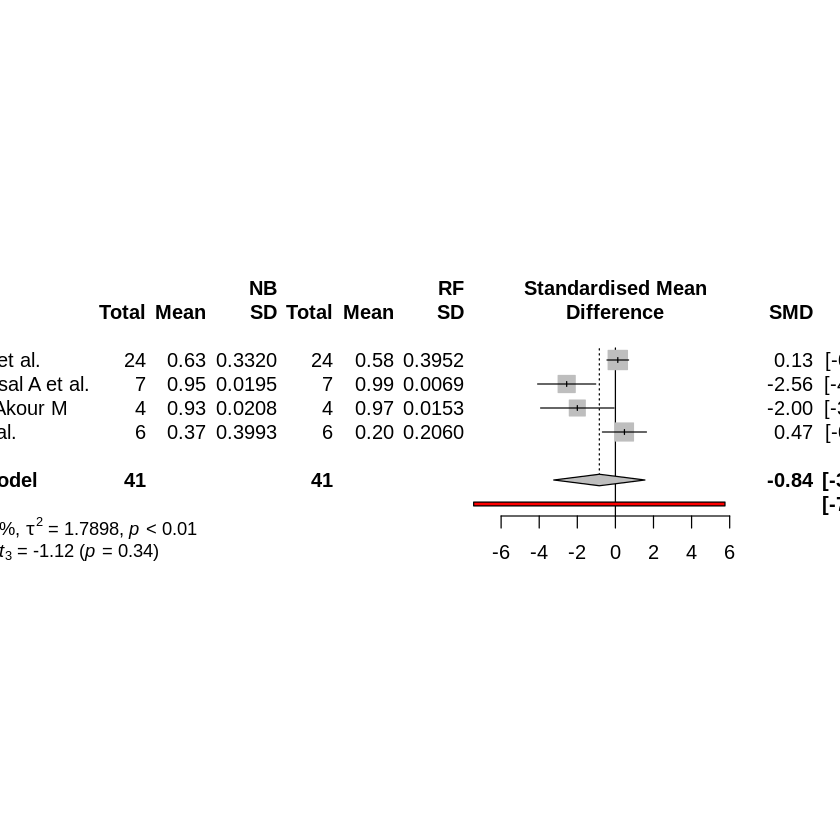

In [ ]:
forest(ma_random_recall, test.overall.random=TRUE)

Saving the plots as pdf

In [ ]:
pdf("/content/forest_pdf/forest-recall.pdf", width = 10.1, height = 3)
forest(ma_random_recall, test.overall.random=TRUE)
dev.off()

png 
  2

In [ ]:
pdf("/content/forest_pdf/forest-precison.pdf", width = 10.1, height = 3)
forest(ma_random_precision, test.overall.random=TRUE)
dev.off()

png 
  2

In [ ]:
pdf("/content/forest_pdf/forest-f_measure.pdf", width =10.1, height = 3)
forest(ma_random_f_measure, test.overall.random=TRUE)
dev.off()

png 
  2

## References



*   [Towards Data Science: How to use R in Google Colab ](https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497)
*   [Meta-package documentation](https://cran.r-project.org/web/packages/meta/meta.pdf)



